<a href="https://colab.research.google.com/github/navaneethreddy25/AD/blob/main/2311CS020474_DAY_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [4]:
df=pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [6]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [7]:
from sklearn.preprocessing import normalize
df_normalized = normalize(df)
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)
df_normalized


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294
...,...,...,...,...,...,...
435,0.776890,0.315197,0.419191,0.343549,0.004760,0.057646
436,0.990872,0.036146,0.019298,0.113919,0.002349,0.059258
437,0.364462,0.388465,0.758545,0.010961,0.372237,0.046827
438,0.937737,0.180530,0.203404,0.094594,0.015310,0.193653


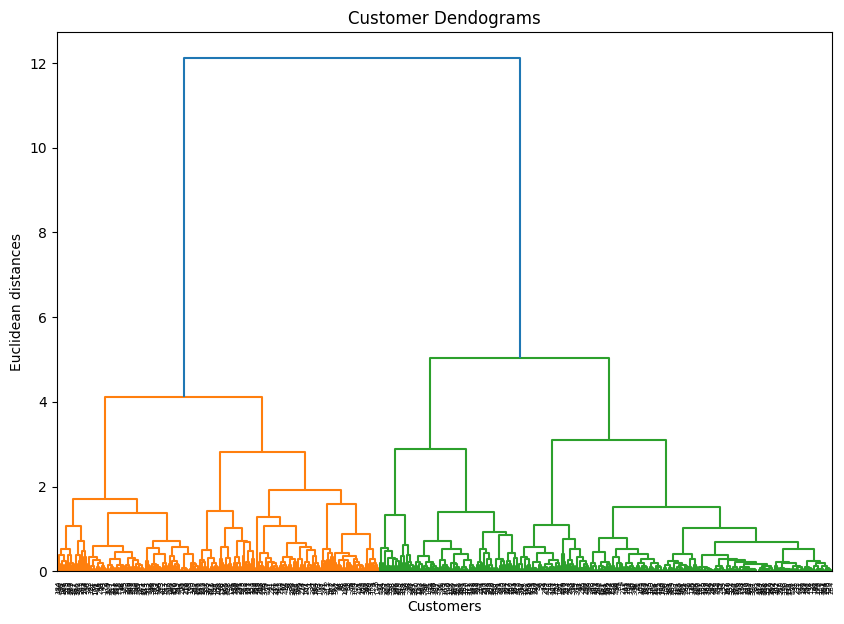

In [8]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df_normalized, method='ward'))
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [9]:
len(set(dend['color_list']))-1

2

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
group=AgglomerativeClustering(n_clusters=4)
group.fit_predict(df_normalized)

array([1, 1, 1, 2, 0, 1, 0, 1, 1, 3, 3, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 3,
       1, 1, 3, 1, 1, 3, 2, 1, 0, 3, 0, 1, 3, 1, 0, 1, 0, 1, 1, 1, 2, 3,
       3, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1, 0, 3, 1, 0, 0, 3, 1, 0,
       2, 0, 0, 2, 1, 2, 1, 3, 3, 2, 2, 2, 1, 3, 1, 0, 0, 0, 3, 1, 1, 3,
       0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1,
       0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 1, 1, 1, 1, 0, 2, 3, 1, 3, 3, 3, 3,
       0, 0, 0, 1, 0, 0, 3, 1, 3, 2, 2, 3, 1, 1, 2, 0, 0, 3, 0, 2, 2, 3,
       2, 0, 3, 3, 0, 3, 3, 3, 0, 1, 3, 3, 0, 3, 0, 1, 3, 3, 3, 0, 3, 2,
       0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 3, 0, 0, 0, 2, 2, 3, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 3,
       3, 1, 3, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 3, 1, 0, 0, 0, 0, 1, 3, 0,

In [12]:
from sklearn.metrics import silhouette_score
silhouette_score(df_normalized, group.labels_)

0.3304341170390966

In [13]:
group.labels_.shape

(440,)

In [14]:
from sklearn.cluster import KMeans

wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)

wcss

[58.21273260099295,
 46.02012344733328,
 37.52377861199375,
 30.713944665782932,
 26.998711380951896,
 24.222999435704317,
 22.355340582700705,
 21.297705988118388,
 20.046554672750055]

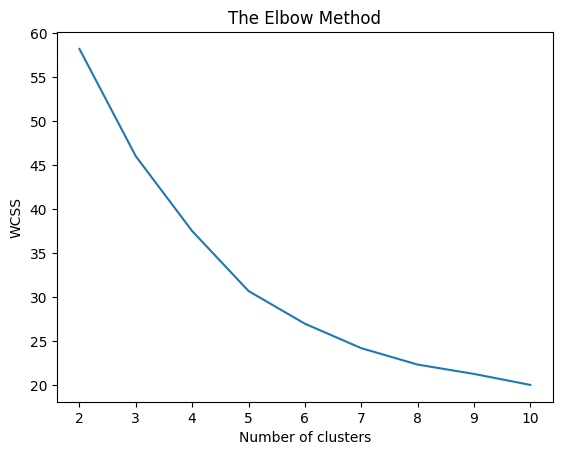

In [15]:
plt.plot(range(2,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
model = KMeans(n_clusters = 5, random_state = 309)
groups = model.fit_predict(df_normalized)


In [18]:
type(groups)

numpy.ndarray

In [19]:
groups

array([2, 3, 3, 1, 4, 2, 2, 2, 2, 0, 0, 4, 2, 2, 2, 4, 0, 3, 2, 2, 4, 1,
       4, 3, 2, 2, 4, 4, 0, 4, 2, 3, 4, 4, 3, 0, 4, 2, 0, 4, 4, 4, 0, 0,
       2, 3, 0, 3, 2, 0, 1, 0, 4, 0, 4, 2, 0, 0, 4, 2, 2, 0, 2, 0, 1, 0,
       0, 2, 3, 4, 1, 2, 1, 4, 2, 4, 3, 0, 4, 3, 4, 0, 2, 4, 2, 0, 3, 4,
       1, 4, 4, 1, 0, 1, 3, 0, 0, 1, 1, 1, 2, 0, 0, 4, 4, 4, 0, 0, 3, 0,
       4, 0, 4, 4, 4, 4, 4, 2, 4, 1, 4, 1, 4, 2, 4, 4, 4, 2, 3, 4, 1, 4,
       4, 4, 4, 4, 3, 3, 2, 2, 2, 4, 4, 1, 4, 0, 4, 4, 1, 4, 4, 3, 4, 3,
       4, 0, 0, 4, 0, 0, 0, 4, 4, 0, 3, 2, 0, 3, 4, 4, 0, 3, 0, 0, 0, 0,
       4, 2, 2, 3, 2, 4, 0, 3, 0, 2, 1, 3, 0, 0, 4, 4, 2, 0, 4, 1, 1, 0,
       2, 4, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 1,
       4, 0, 1, 1, 4, 4, 2, 1, 0, 1, 1, 3, 4, 3, 4, 3, 4, 4, 4, 4, 1, 4,
       4, 2, 0, 0, 4, 4, 4, 1, 2, 0, 1, 2, 3, 4, 2, 1, 4, 4, 2, 1, 4, 0,
       0, 3, 0, 4, 0, 4, 1, 3, 3, 4, 3, 3, 4, 1, 1, 2, 2, 2, 4, 4, 4, 4,
       4, 1, 4, 4, 2, 2, 3, 0, 4, 2, 4, 2, 0, 0, 2,

In [20]:
df.head(3)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844


In [23]:
group_num=pd.DataFrame(groups,columns=['Group'])
group_num

,Group
0,2
1,3
2,3
3,1
4,4
...,...
435,2
436,4
437,0
438,4


In [24]:
cust_Kmeans_data=pd.concat([df,group_num],axis=1)
cust_Kmeans_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,3
2,6353,8808,7684,2405,3516,7844,3
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,4
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,2
436,39228,1431,764,4510,93,2346,4
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,4


In [26]:
cust_Kmeans_data[cust_Kmeans_data['Group']==0]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
9,6006,11093,18881,1159,7425,2098,0
10,3366,5403,12974,4400,5977,1744,0
16,1020,8816,12121,134,4508,1080,0
28,4113,20484,25957,1158,8604,5206,0
35,688,5491,11091,833,4239,436,0
...,...,...,...,...,...,...,...
417,5065,5499,11055,364,3485,1063,0
418,660,8494,18622,133,6740,776,0
420,4456,5266,13227,25,6818,1393,0
430,3097,4230,16483,575,241,2080,0


In [27]:
cust_Kmeans_data[cust_Kmeans_data['Group']==3]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
1,7057,9810,9568,1762,3293,1776,3
2,6353,8808,7684,2405,3516,7844,3
17,5876,6157,2933,839,370,4478,3
23,26373,36423,22019,5154,4337,16523,3
31,2612,4339,3133,2088,820,985,3
34,1502,1979,2262,425,483,395,3
45,5181,22044,21531,1740,7353,4985,3
47,44466,54259,55571,7782,24171,6465,3
68,2446,7260,3993,5870,788,3095,3
76,717,3587,6532,7530,529,894,3


In [29]:
silhouette_score(df_normalized, groups)

0.3715110094792784

In [34]:
np.round(silhouette_score(df_normalized, groups),2)

0.37

In [35]:
dbscan = DBSCAN(eps=1, min_samples=10)
dbscan.fit(df_normalized)

DBSCAN(eps=1, min_samples=10)